In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu_speed(n_list=[100,500,1000,2000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha1,1), (p_alpha1,4)],
              show_progress=True,
              std=1):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k!=1 else print(f"RCIT (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)



        for i, n in enumerate(n_list):

    
            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"t={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                
                np.random.seed(sed)
                random.seed(sed)

                dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian',noise_dis='cauchy',noise_std=std)))
                dataII = np.hstack((generate_samples(n=n,indp='N',z_dis='gaussian',noise_dis='cauchy',noise_std=std)))

                if k == 1:
                    obj_ECIT = ECIT(dataI, rcit, p_ensemble, k=1)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, rcit, p_ensemble, k=1)
                    pII = obj_ECIT([0], [1], [2])
                elif k == 0:

                    ########################################

                    if n < 6000:

                    ########################################
                    
                        obj_ECIT = ECIT(dataI, kcit, p_ensemble, k=1)
                        pI = obj_ECIT([0], [1], [2])
                        obj_ECIT = ECIT(dataII, kcit, p_ensemble, k=1)
                        pII = obj_ECIT([0], [1], [2])
                    else:
                        pI = 0
                        pII = 0

                elif k<100:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, k)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, k)
                    pII = obj_ECIT([0], [1], [2])
                    
                else:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, int(n/k))
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, int(n/k))
                    pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        if k==0:
            eI, eII, tim = result
            num_ = np.sum(np.array(eI)<1)
            eI = eI[:num_]
            eII = eII[:num_]
            tim = tim[:num_]
            result = [eI, eII, tim]

        key_name = f"Ensemble KCIT (k={k}, {p_ensemble.__name__})" if k != 1 else f"RCIT"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)
        if len(eI) != len(n_list):
            n_list_ = n_list[:len(eI)]
            ax_eI.plot(n_list_, eI, label=label)
            ax_eII.plot(n_list_, eII)
            ax_eSum.plot(n_list_, eSum)
            ax_tim.plot(n_list_, tim)
        else:
            ax_eI.plot(n_list, eI, label=label)
            ax_eII.plot(n_list, eII)
            ax_eSum.plot(n_list, eSum)
            ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:00<00:00,  1.64it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [12:10<00:00,  7.31s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [11:26<00:00,  6.87s/it]


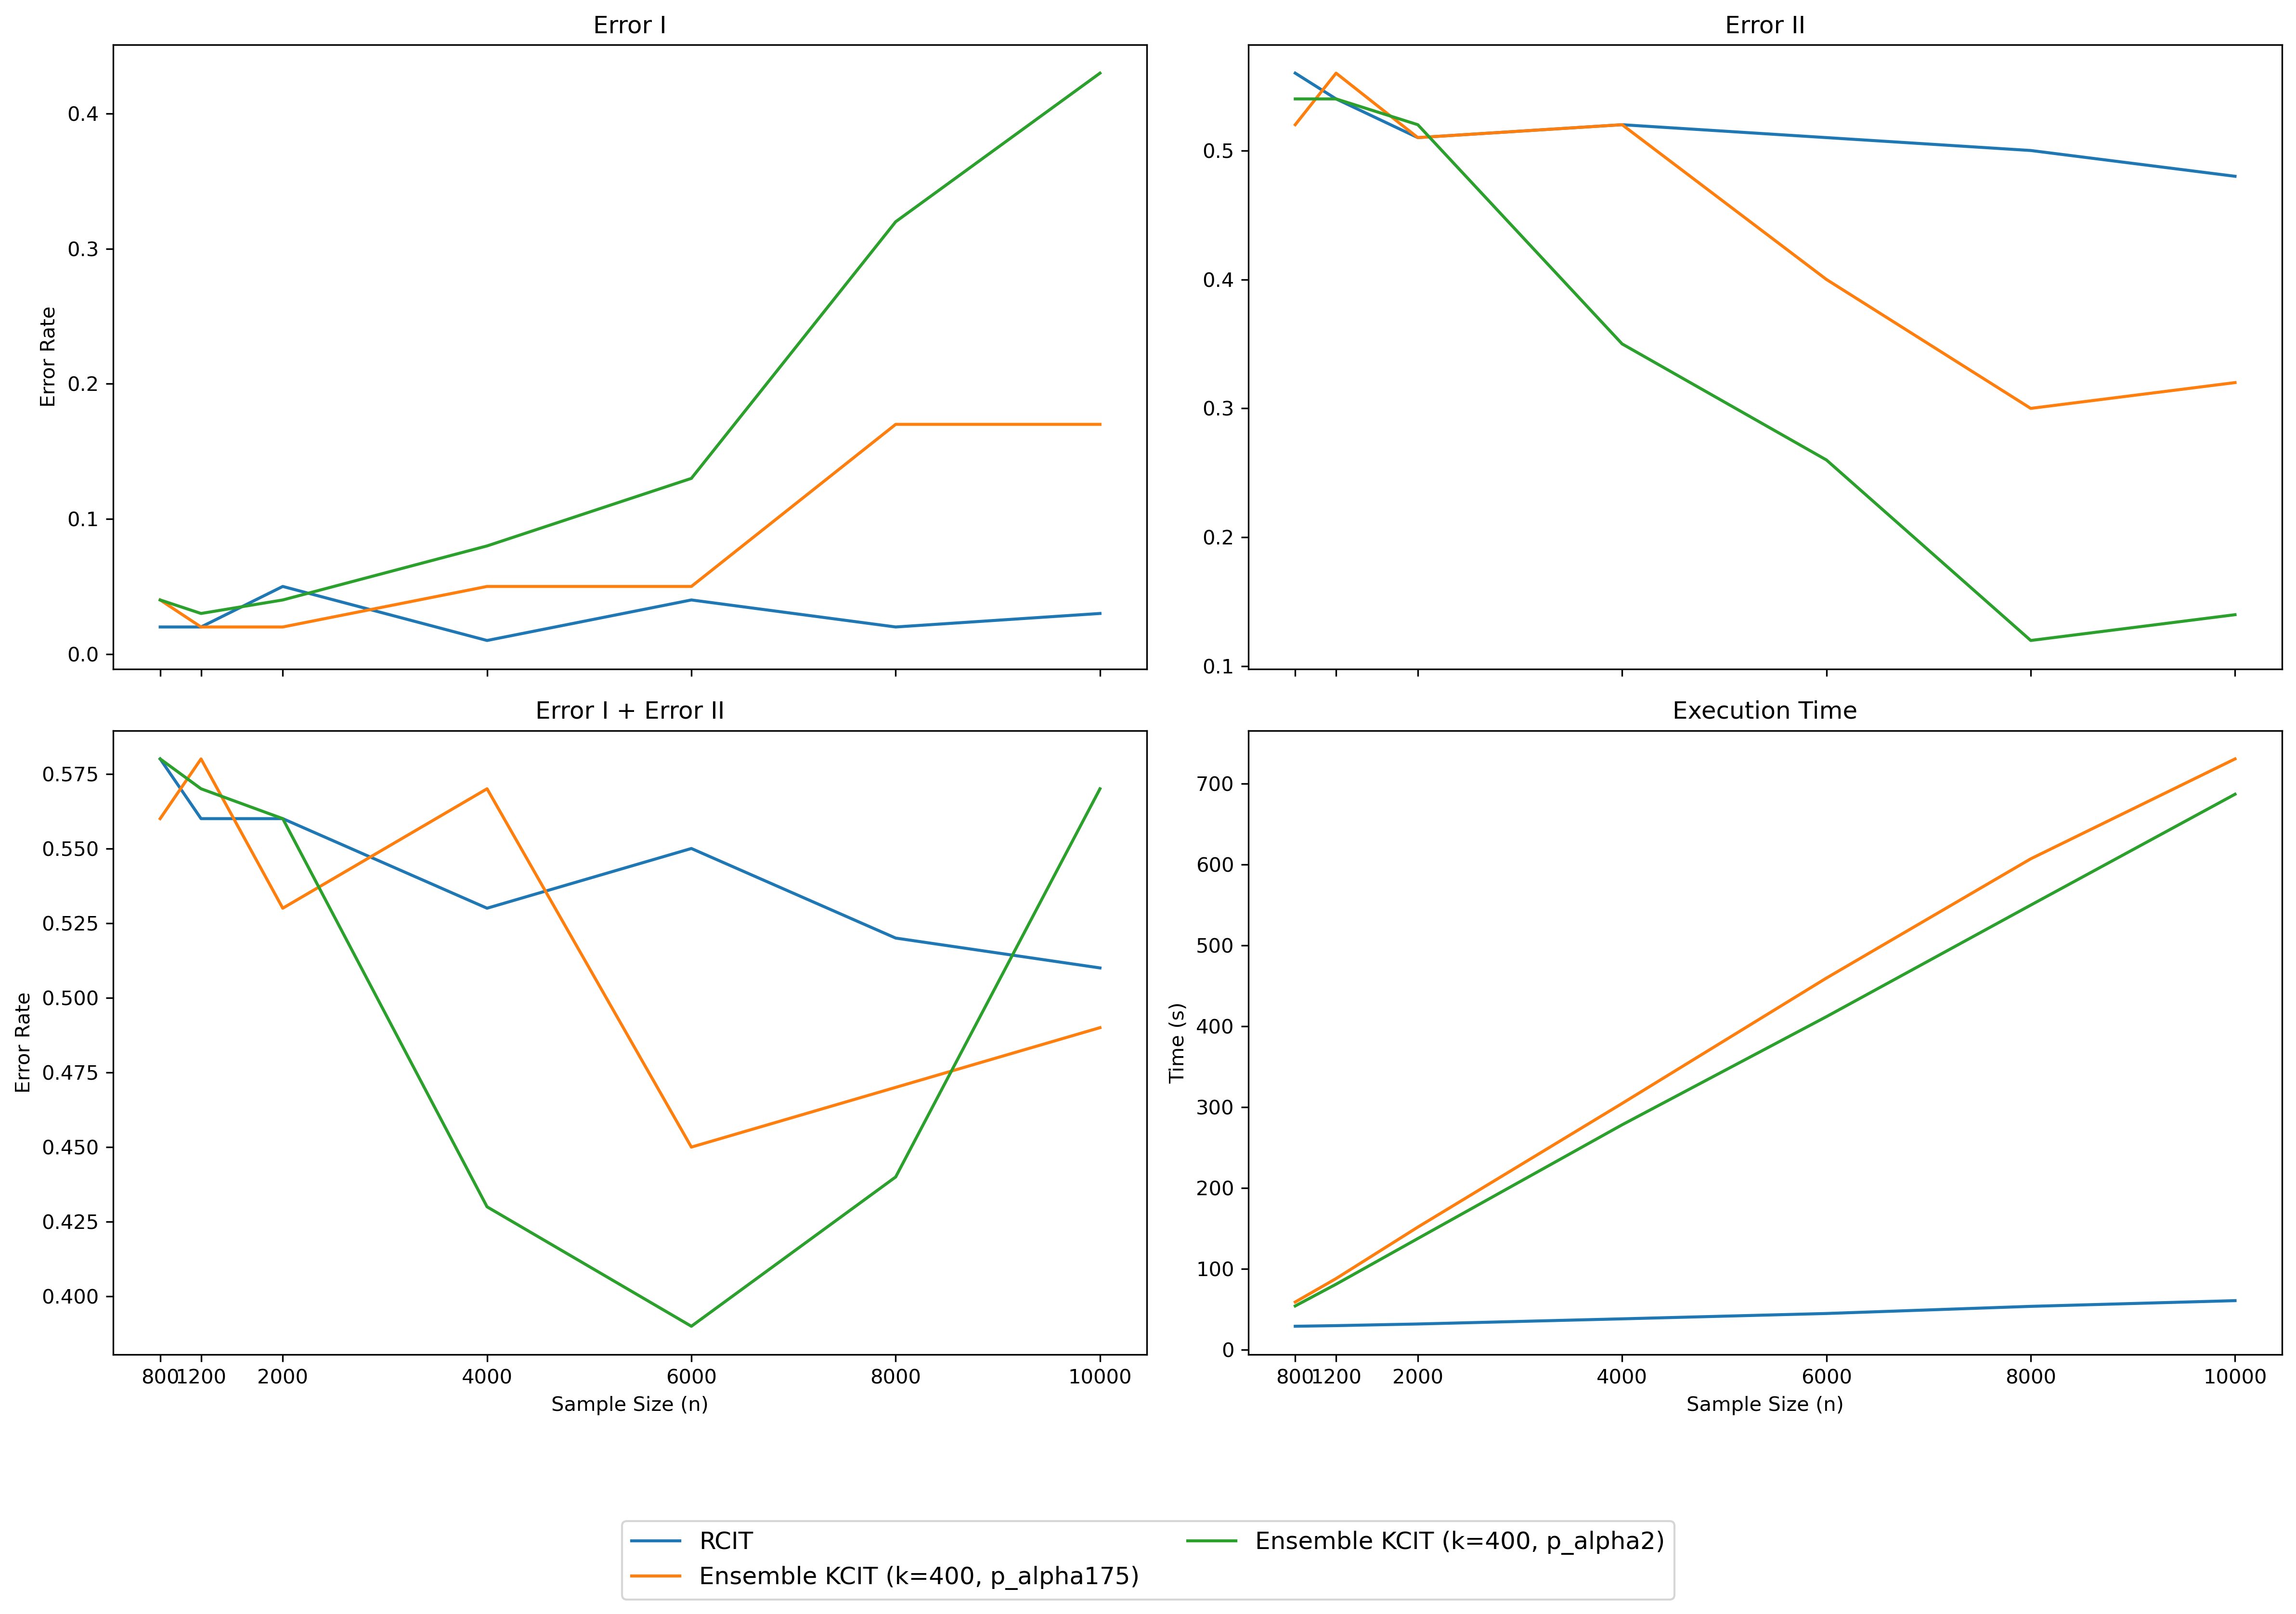

[[[0.02, 0.02, 0.05, 0.01, 0.04, 0.02, 0.03],
  [0.56, 0.54, 0.51, 0.52, 0.51, 0.5, 0.48],
  [29.25265884399414,
   30.029022932052612,
   32.06615710258484,
   38.4329731464386,
   45.03360366821289,
   53.86137008666992,
   60.915241956710815]],
 [[0.04, 0.02, 0.02, 0.05, 0.05, 0.17, 0.17],
  [0.52, 0.56, 0.51, 0.52, 0.4, 0.3, 0.32],
  [59.22010397911072,
   88.21339392662048,
   151.80917620658875,
   304.7214341163635,
   459.68633913993835,
   607.0804827213287,
   730.5826108455658]],
 [[0.04, 0.03, 0.04, 0.08, 0.13, 0.32, 0.43],
  [0.54, 0.54, 0.52, 0.35, 0.26, 0.12, 0.14],
  [54.350245237350464,
   81.24752807617188,
   137.69916009902954,
   278.3081169128418,
   411.9658958911896,
   549.8649599552155,
   686.9281878471375]]]

In [ ]:
ensembles = [(p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000]

results = ecit_simu_speed(n_list, t=100, cit=rcit, ensembles=ensembles, std=1)
show_results(results, ensembles, n_list)
results

RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [12:08<00:00,  7.28s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [11:22<00:00,  6.83s/it]


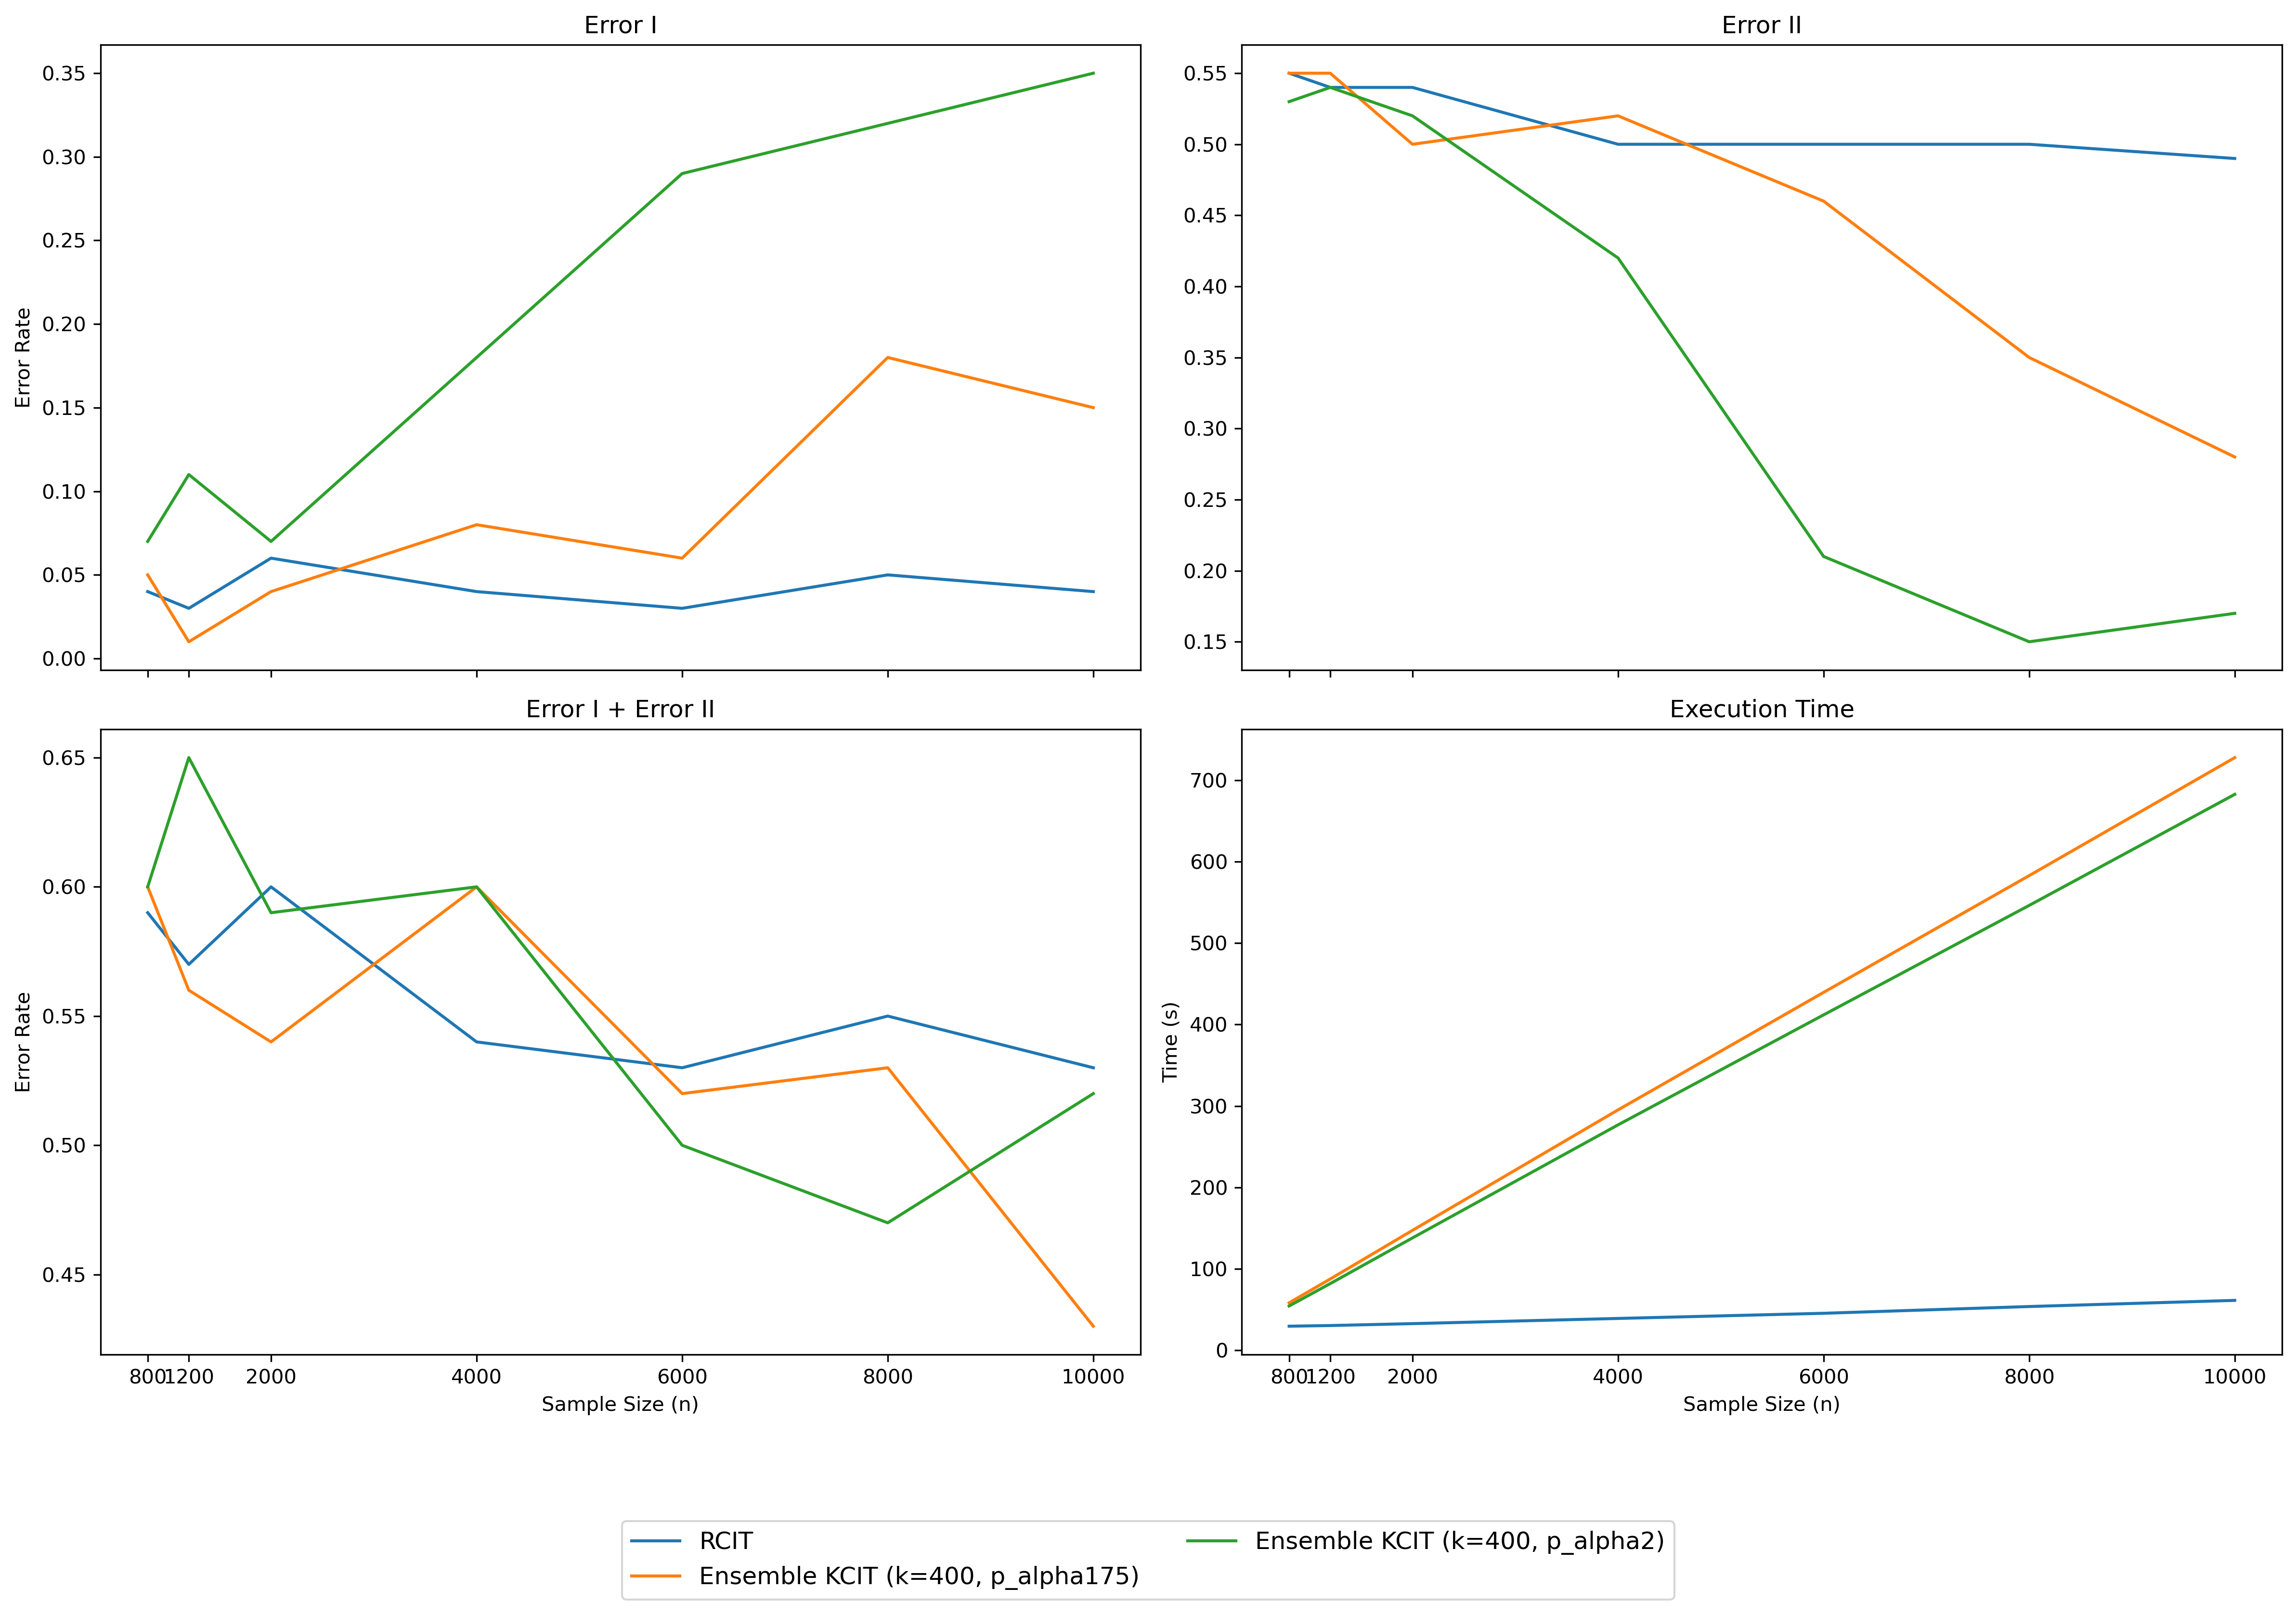

[[[0.04, 0.03, 0.06, 0.04, 0.03, 0.05, 0.04],
  [0.55, 0.54, 0.54, 0.5, 0.5, 0.5, 0.49],
  [29.380861043930054,
   30.194087982177734,
   32.53431725502014,
   38.91166090965271,
   45.24826979637146,
   53.553844928741455,
   61.10542583465576]],
 [[0.05, 0.01, 0.04, 0.08, 0.06, 0.18, 0.15],
  [0.55, 0.55, 0.5, 0.52, 0.46, 0.35, 0.28],
  [58.09841704368591,
   87.40722179412842,
   147.13907098770142,
   295.1743211746216,
   439.5627338886261,
   583.0345551967621,
   728.0034658908844]],
 [[0.07, 0.11, 0.07, 0.18, 0.29, 0.32, 0.35],
  [0.53, 0.54, 0.52, 0.42, 0.21, 0.15, 0.17],
  [54.234703063964844,
   81.7465341091156,
   137.86337804794312,
   276.77344012260437,
   411.9293808937073,
   546.4296178817749,
   682.8756151199341]]]

In [3]:
ensembles = [(p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=rcit, ensembles=ensembles, std=0.75)
show_results(results, ensembles, n_list)
results

RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:00<00:00,  1.64it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [12:08<00:00,  7.29s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [11:23<00:00,  6.83s/it]


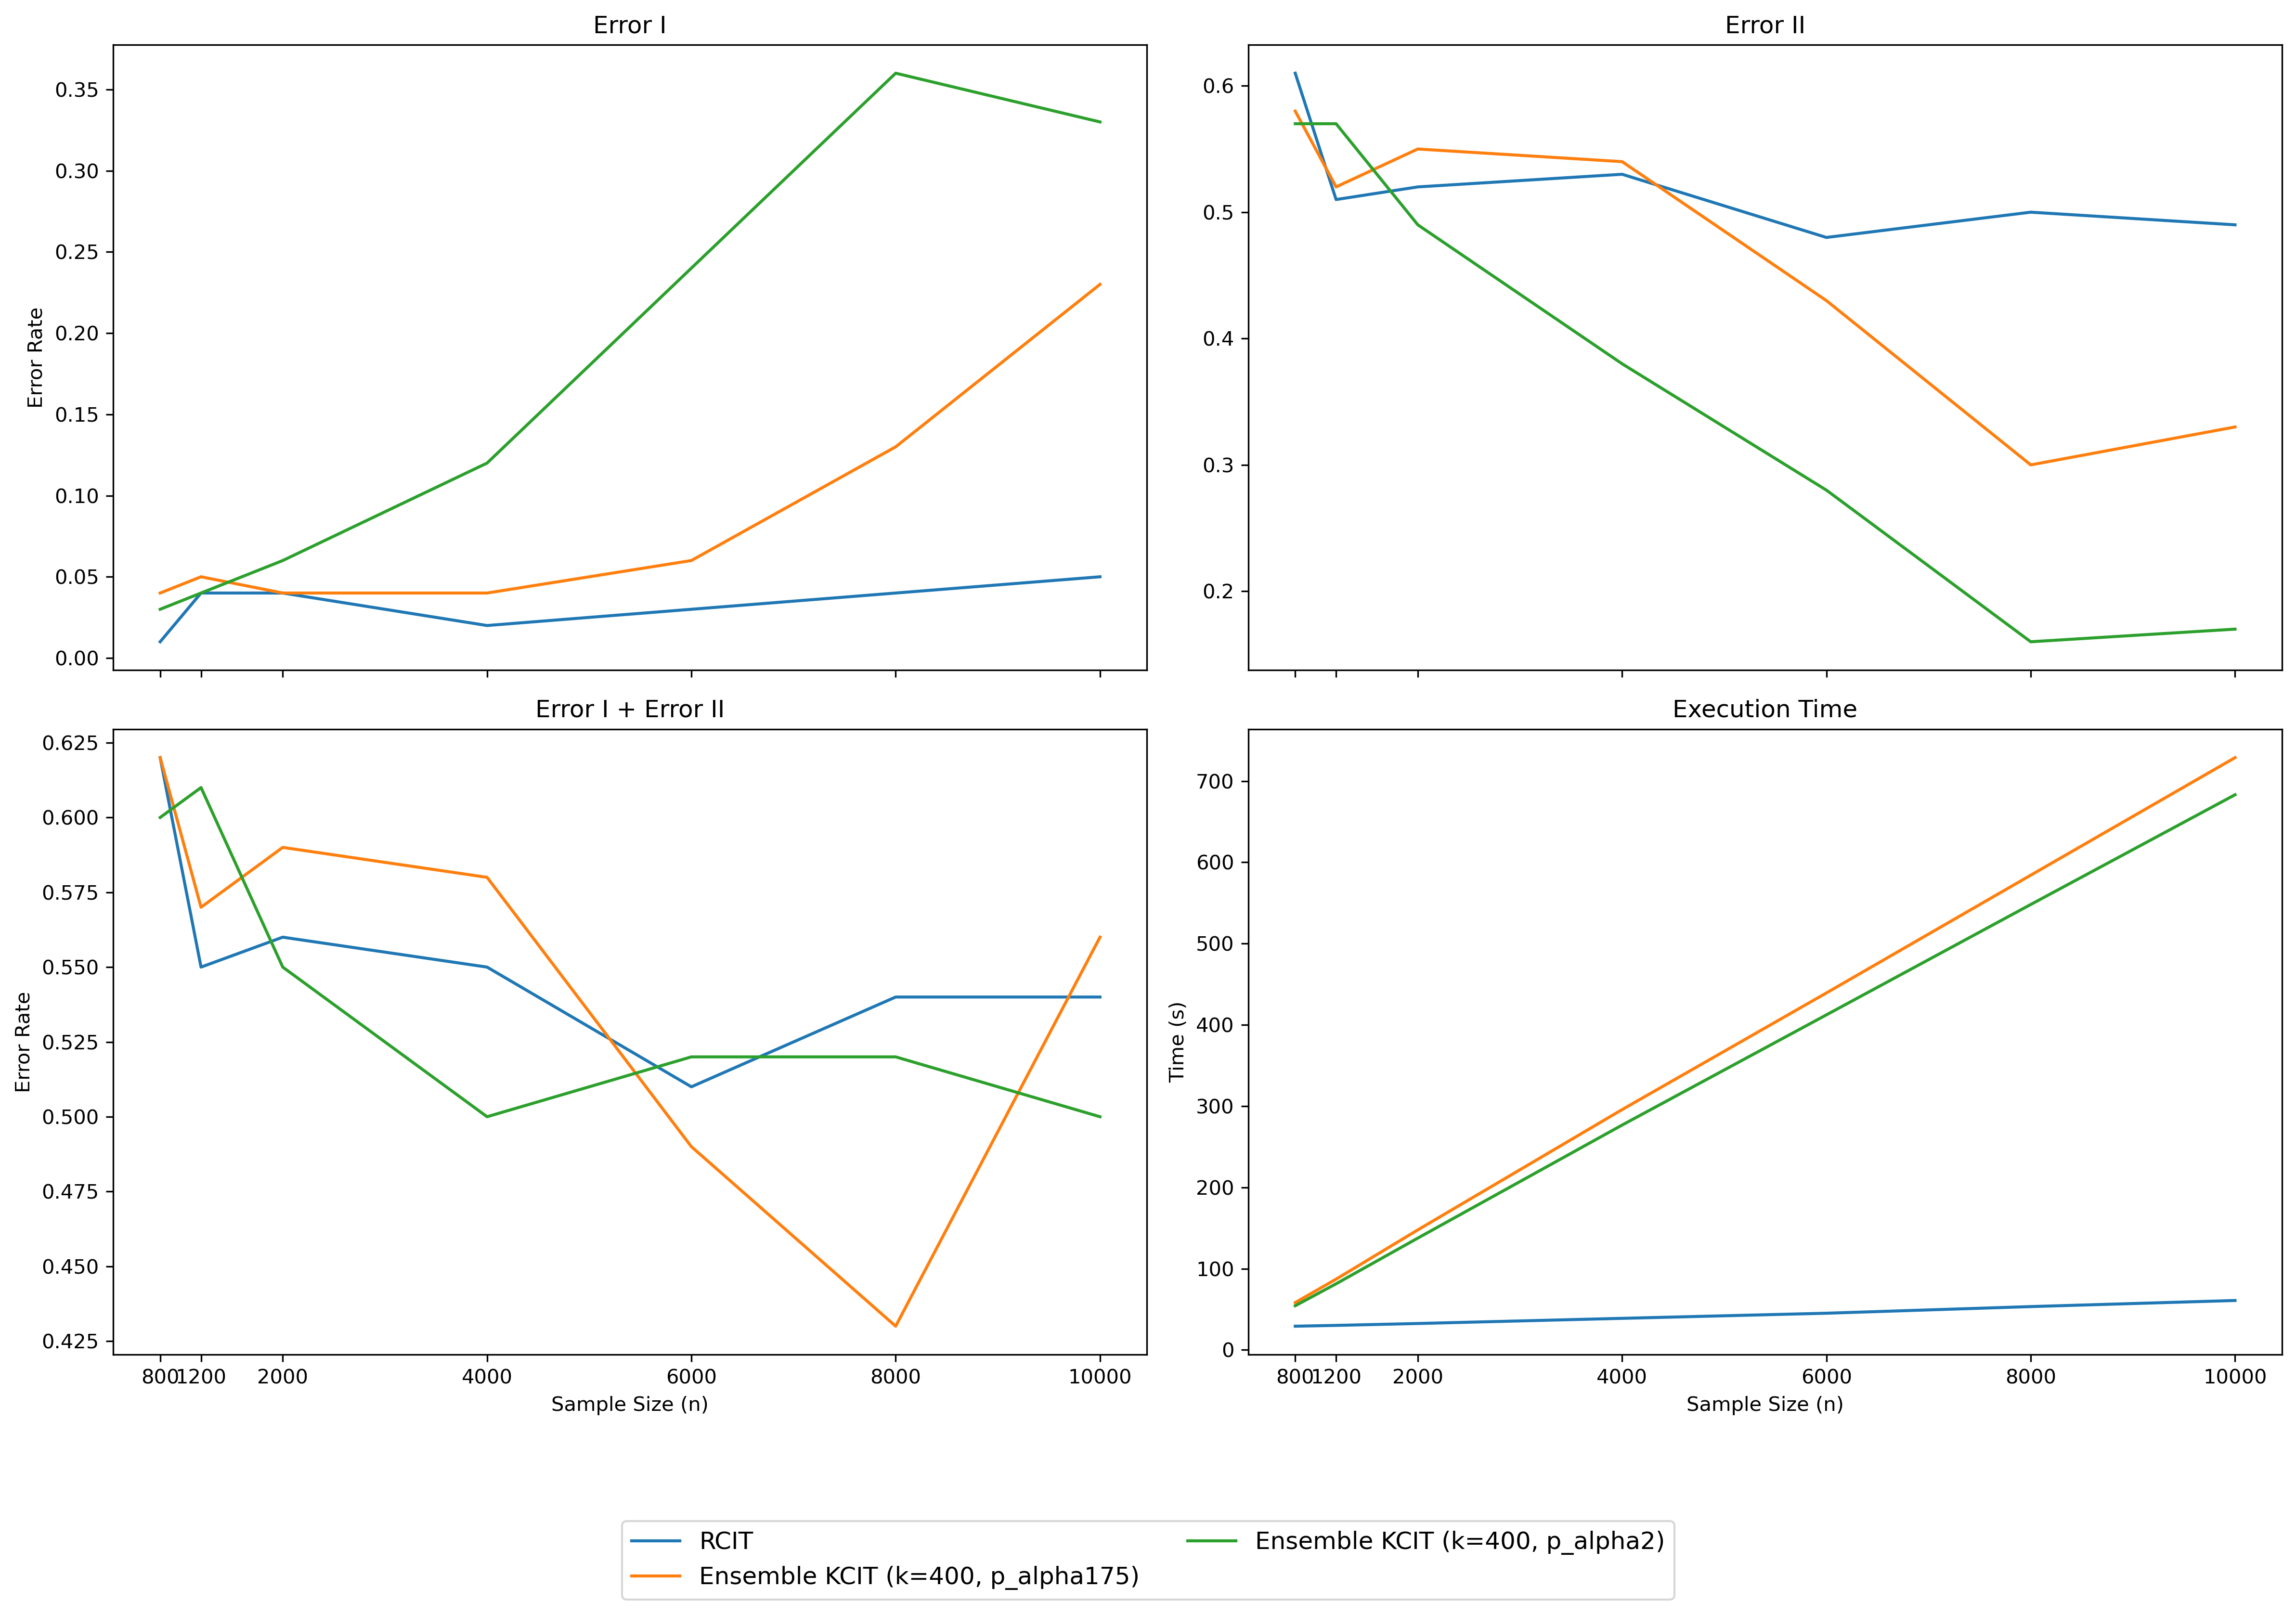

[[[0.01, 0.04, 0.04, 0.02, 0.03, 0.04, 0.05],
  [0.61, 0.51, 0.52, 0.53, 0.48, 0.5, 0.49],
  [29.217788219451904,
   30.205543041229248,
   32.536288022994995,
   38.88804793357849,
   45.18135213851929,
   53.354626178741455,
   60.84512209892273]],
 [[0.04, 0.05, 0.04, 0.04, 0.06, 0.13, 0.23],
  [0.58, 0.52, 0.55, 0.54, 0.43, 0.3, 0.33],
  [58.267428159713745,
   87.10548424720764,
   147.7253701686859,
   295.7395646572113,
   439.29873991012573,
   584.1623101234436,
   728.8065960407257]],
 [[0.03, 0.04, 0.06, 0.12, 0.24, 0.36, 0.33],
  [0.57, 0.57, 0.49, 0.38, 0.28, 0.16, 0.17],
  [54.36983585357666,
   81.39756989479065,
   137.62863898277283,
   276.7124779224396,
   412.3164849281311,
   548.1028463840485,
   683.1342108249664]]]

In [4]:
ensembles = [(p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=rcit, ensembles=ensembles, std=0.5)
show_results(results, ensembles, n_list)
results

RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:00<00:00,  1.65it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [12:08<00:00,  7.28s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [11:22<00:00,  6.83s/it]


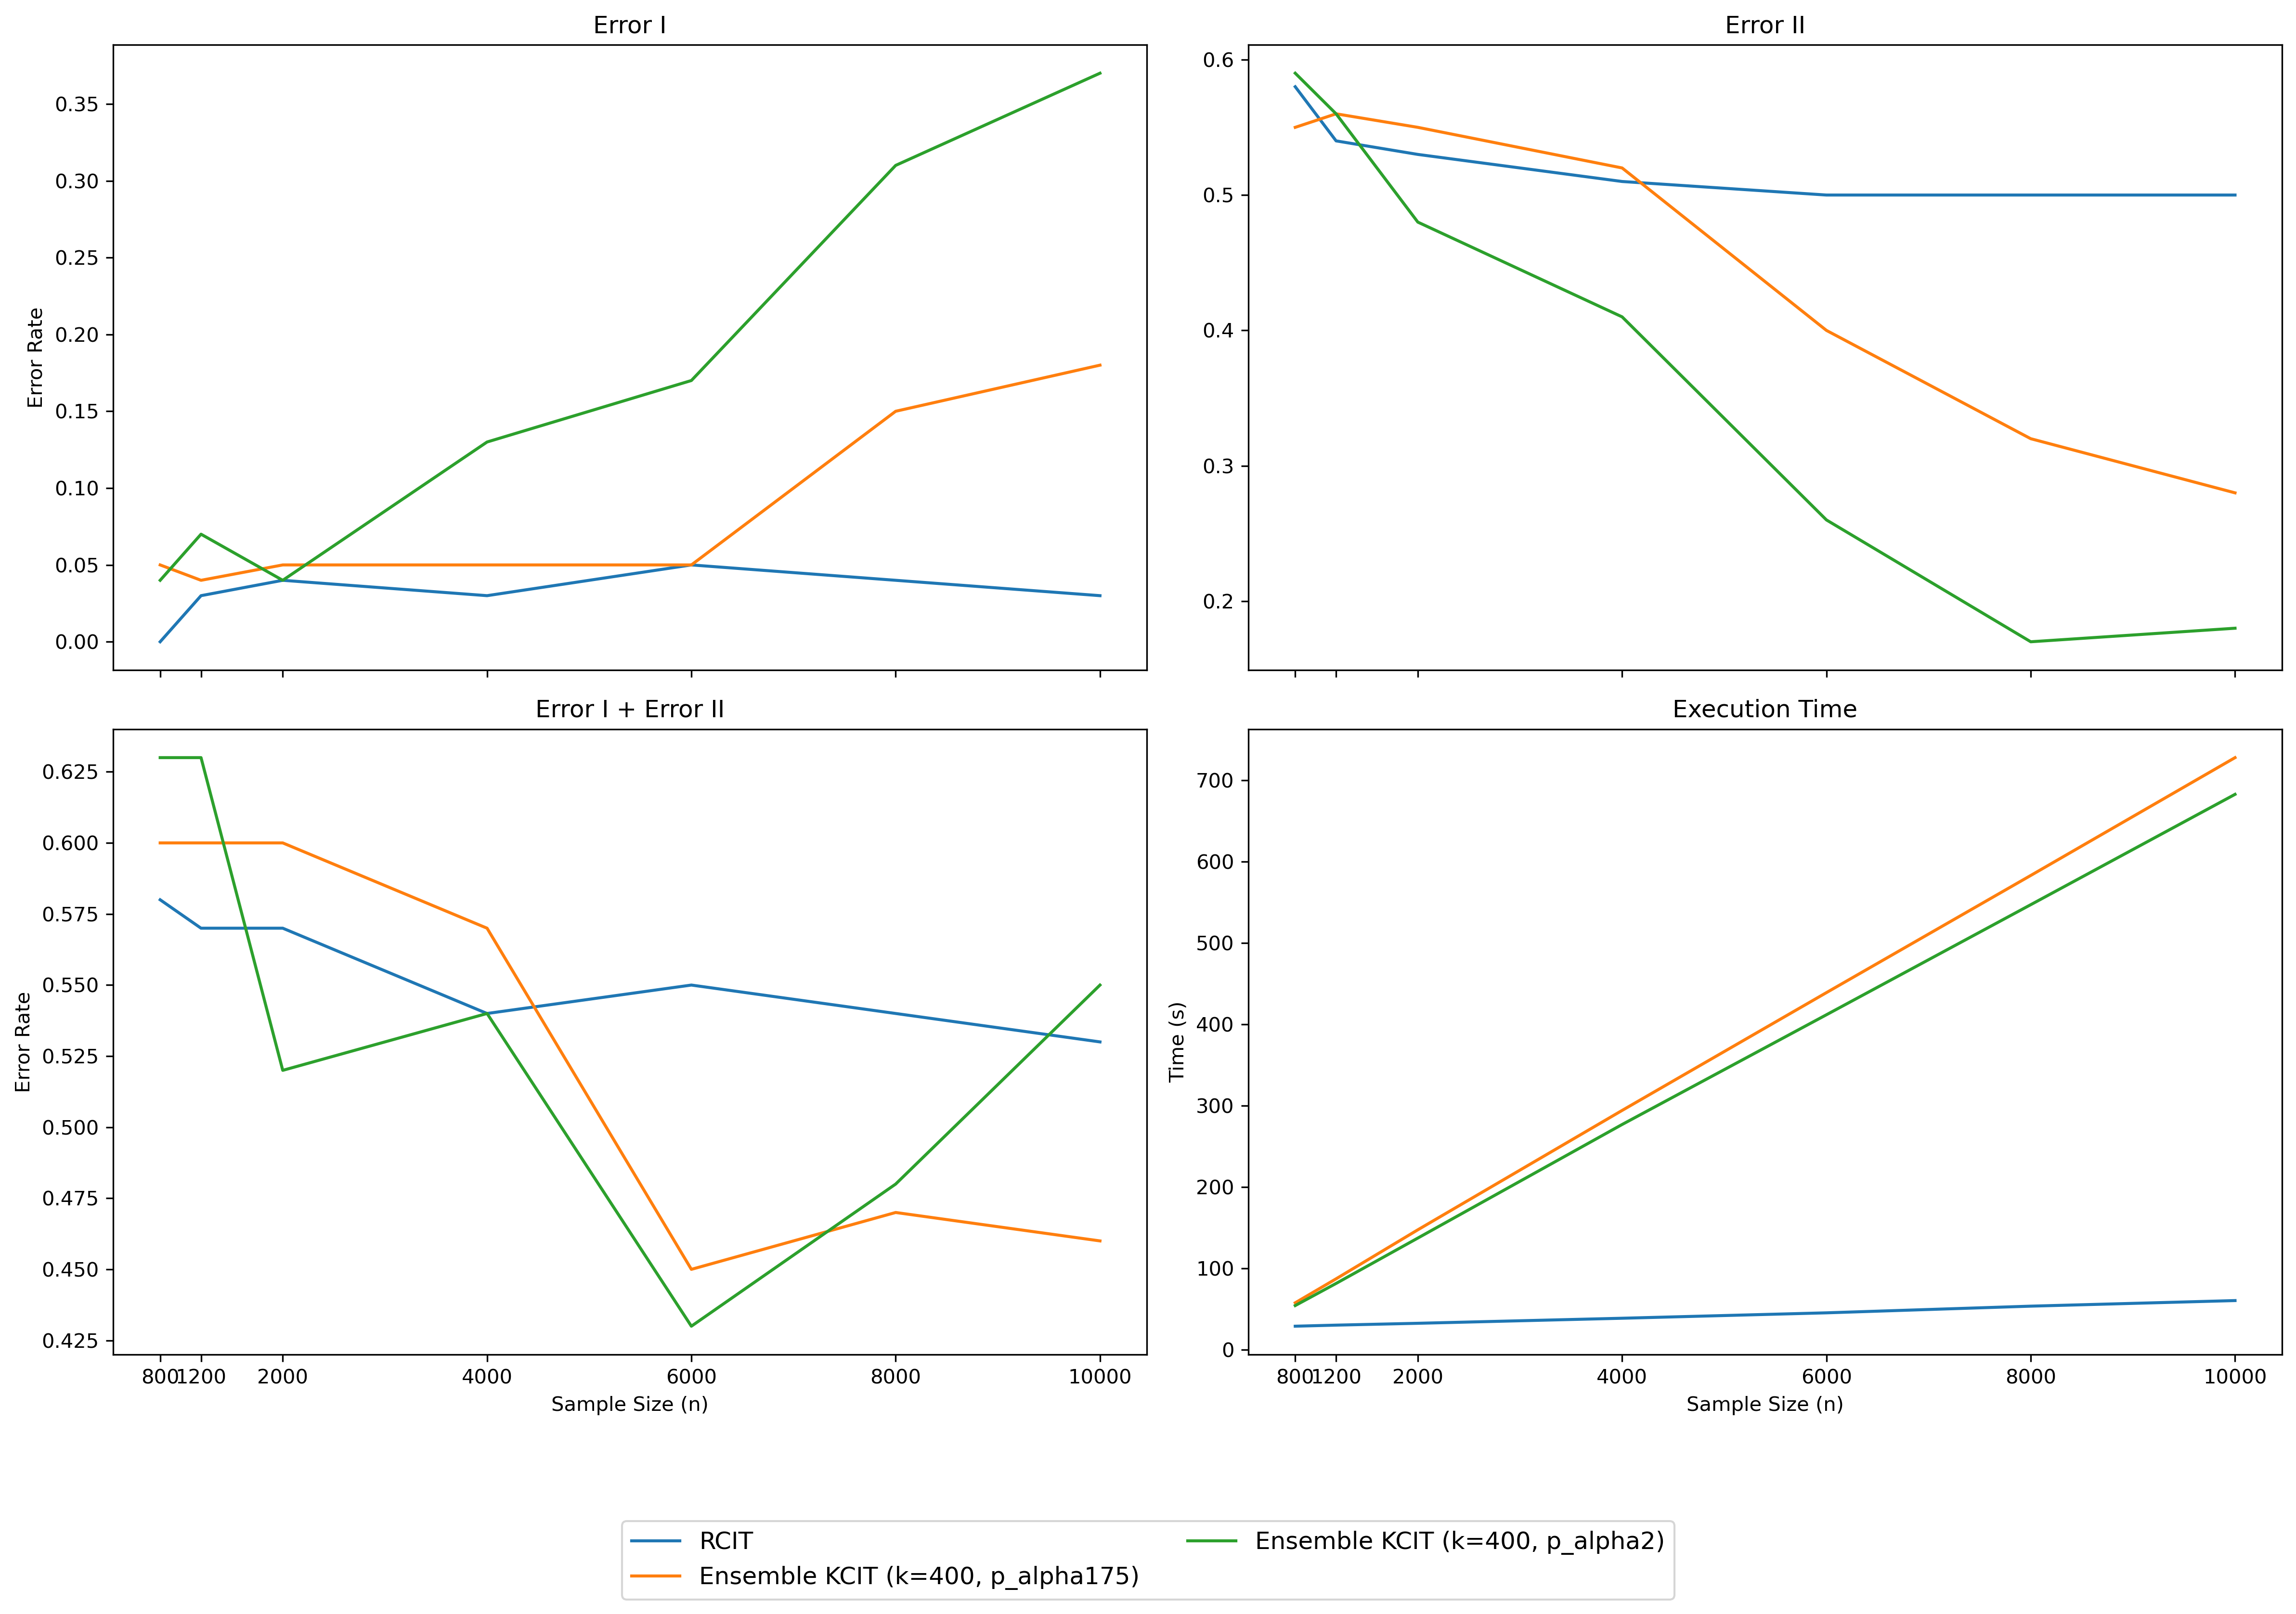

[[[0.0, 0.03, 0.04, 0.03, 0.05, 0.04, 0.03],
  [0.58, 0.54, 0.53, 0.51, 0.5, 0.5, 0.5],
  [29.085238933563232,
   30.39648199081421,
   32.66219782829285,
   38.87002491950989,
   45.52011799812317,
   53.72608208656311,
   60.5891478061676]],
 [[0.05, 0.04, 0.05, 0.05, 0.05, 0.15, 0.18],
  [0.55, 0.56, 0.55, 0.52, 0.4, 0.32, 0.28],
  [57.848182916641235,
   87.33701419830322,
   147.5787329673767,
   294.35683608055115,
   439.1801657676697,
   583.2146821022034,
   728.0756537914276]],
 [[0.04, 0.07, 0.04, 0.13, 0.17, 0.31, 0.37],
  [0.59, 0.56, 0.48, 0.41, 0.26, 0.17, 0.18],
  [54.46592307090759,
   81.65752816200256,
   137.42749190330505,
   277.06682801246643,
   411.9621088504791,
   547.2836029529572,
   682.9477570056915]]]

In [5]:
ensembles = [(p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=rcit, ensembles=ensembles, std=1.5)
show_results(results, ensembles, n_list)
results